<a href="https://www.numfys.net"><img class="logo" /></a>

# Numerical solution of the time‐independent Schrödinger equation
## TFY4170-Exercise3-2022-V1

### Quantum  Mechanics

<section class="post-meta">
By Pawel Sikorski, Department of Physics, NTNU
</section>
Last edited: March 11th 2022


### Before you start:


Study these three approached to numerically solve time-independent Schrödinger Equation in 1D.

https://nbviewer.org/urls/www.numfys.net/media/notebooks/schrodinger_equation.ipynb

https://nbviewer.org/urls/www.numfys.net/media/notebooks/eigenenergies_through_matrix_diagonalization.ipynb

https://nbviewer.org/urls/www.numfys.net/media/notebooks/ex_qm1_numerical_determination_of_eigenvalues_for_harmonic_oscillator.ipynb


Note. To do proper simulations of a physical system, one need to make sure that there is a link between units in the simulation and the physical world. In the examples above one assumes $\hbar=m=1$. This assumption is part of the atomic units systems, https://en.wikipedia.org/wiki/Hartree_atomic_units.

Distance and energy in these units can easily be converted to S.I. units. Please use S.I. units when reporting results and making plots. 

## Part 1

The finite potential square well, is similar to the infinite potential well (Section 14.15) but, in this case, the walls of the well are of finite height. See page 312 in the textbook for more details. 


### Part 1: To Do 
Using a method of choice, calculate allowed energy levels and plot wave function for a finite potential square well.  Experiment with different values for the well size and the potential difference between inside and outside the well.

Allowed energy levels for U = 200 and well size a = 1: [  4.11117097  16.41119481  36.79085033  65.03202811 100.71707877
 142.93281242 188.47904391]


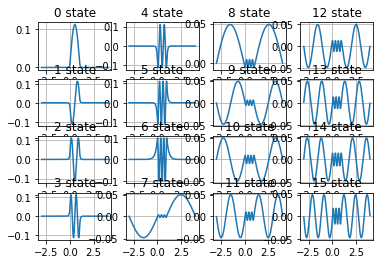

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from matplotlib import animation
from scipy.constants import hbar, electron_mass, speed_of_light, pi
import matplotlib.widgets as wdgt
%matplotlib inline

def part1():
    a = 1
    U = 200
    N = 1000
    x_min = 0-3
    x_max = a+3
    dx = (x_max-x_min)/(N-1)

    xs = np.linspace(x_min, x_max, N)
    V = [0 if x >= 0 and x < a else U for x in xs]
    H = np.zeros((N, N))
    for i in range(N):
        H[i][i] = (1/dx**2+V[i])
        if i > 0:
            H[i][i-1] = -1/(2*dx**2)
        if i < N-1:
            H[i][i+1] = -1/(2*dx**2)
    E, psi = linalg.eigh(H)

    # Plot 16 lowest eigenstates
    print(f"Allowed energy levels for U = {U} and well size a = {a}: {E[E < U]}")
    fig, axs = plt.subplots(4, 4)
    for y in range(4):
        for x in range(4):
            i = y*4 + x
            axs[x, y].set_title(f"{i} state")
            axs[x, y].plot(xs, psi[:, i])
            axs[x, y].grid()
    plt.show();
part1()

### Comments on task 1

Here we see the first 4 states after the ground state are bound, meaning $E < U_0$, and the states after that are scattering ($E > U_0$). This makes sense as we can see the 5. state has an E greater than 100.

As we see from the gallery below if the U is higher, we have more bound states.

https://imgur.com/a/m83rCZP

There is also a python file named part1.py in the same folder ast this notebook in which we have a function that allows you to interactively change the parameters $a$ and $U$ and plot the schrodinger solution of your choice in it. It is a little compute intensive but it works. 

From experimenting with it i have found that increasing the width of the well reduces the eigenvalues drastically, which increases the amount of bound states. Changing the wall height interestingly has way more of an effect on the scattered than the bound states, altering their eigenvalues. This makes sense as we have defined the potential inside the well to be 0 and thus are changing the energy outside the well. I believe if we defined the potential outside the well to be 0 we would see the opposite effect.


## Part 2


Read through this page that describes how harmonic oscillator approach can be used to study molecular vibrations: 
    
https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Physical_Chemistry_(LibreTexts)/05:_The_Harmonic_Oscillator_and_the_Rigid_Rotor/5.03:_The_Harmonic_Oscillator_Approximates_Vibrations    

Now we would like to study molecular vibrations using a more realistic form of the potential energy function, called the  Morse Potential (https://en.wikipedia.org/wiki/Morse_potential). The Morse Potential is a good approximation to  V(r)  and is best when looking for a general formula for all  r  from 0 to  $\infty$ , not just applicable for the local region around the  $r_o$. Paremeter $r$ represents interatomic separation, and $r>0$; $r_0$ is the equlibrium distance between two vibrating atoms.

$$ V(r) = D \left(1 - e^{-(r-r_0)}\right)^2 $$

This can also be written as: 
$$U(r) =U_0\left( e ^{-2a(r-r_0)} -2 e^{-a(r-r_0)}\right).$$

For $N_2$ molecule, the parameters are: $U_0$ = 943kJ/mol; $r_0$ = 1.08 Å ; $a$ = 2.73Å $^{-1}$  

Here $r_0$ is the equlibrium distance between two vibrating atoms. 


### Part 2: To Do 
Claculate Eigenenergies and Eigenfunctions (wavefunctions) for the ground state and first 5 excited states. Detarmine vibration frequency for each of these states. Determine wavelength of electromagnetic radiation that this molecule is expected to absorb  on transitions between ground and excited states. 

In [14]:
def draw_interactive(xs, V, E, psi, N):
    fig, ax = plt.subplots()
    pot, = plt.plot(xs, V)
    plt.ylim(-1500, 1000)
    schrod, = plt.plot(xs, E[0]+psi[:,0]*1000)
    plt.subplots_adjust(bottom=0.25)
    pickable_states = [i for i in range(10)] + [10*i for i in range(1, 10)] + [25*i for i in range(4, 8+1)]
    stateax = plt.axes([0.25, 0.15, 0.65, 0.03])
    state_number = wdgt.Slider(
        ax=stateax,
        label="Wave equation state",
        valmin=0,
        valmax=100,
        valstep=1,
        valinit=0
    )

    def update(_):
        state = state_number.val
        schrod.set_ydata(E[state]+psi[:,state]*1000)
        fig.canvas.draw_idle()

    state_number.on_changed(update)

    plt.show()

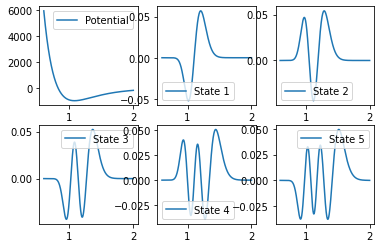

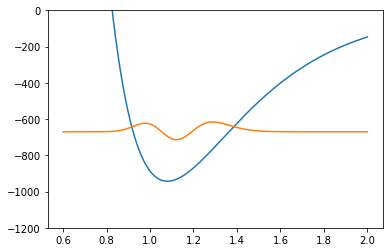

state = 0
E_n = 58.34753955611302 J
f_n = 9.28629933760528 Hz
wavelength = 'Ground state does not have' m

state = 1
E_n = 169.45264266678294 J
f_n = 26.969225700403115 Hz
wavelength = 16953780.830684077 m

state = 2
E_n = 273.1043573565455 J
f_n = 43.46590845322965 Hz
wavelength = 8771090.885967951 m

state = 3
E_n = 369.3029000071973 J
f_n = 58.7763820343174 Hz
wavelength = 6057626.935828837 m

state = 4
E_n = 458.0484598942837 J
f_n = 72.90067656780504 Hz
wavelength = 4712652.56461049 m

state = 5
E_n = 539.3412199709708 J
f_n = 85.83882117159327 Hz
wavelength = 3916166.9768388662 m

[-884.65246044 -773.54735733 -669.89564264 -573.69709999 -484.95154011
 -403.65878003]


In [28]:
def part2():
    hbar = 1
    Planck = hbar*(2*pi)

    N = 2000
    x_min = 0.6
    x_max = 2
    dx = (x_max-x_min)/(N-1)

    xs = np.linspace(x_min, x_max, N)

    U_0 = 943 # *10**3 # J/mol
    r_0 = 1.08 # *10**-10 #m
    alpha = 2.73 # *10**10 # m^-1
    # U = lambda x: U_0*(np.exp(-2*alpha*(x-r_0))-2*np.exp(-alpha*(x-r_0)))
    # V = [U(x) for x in xs]
    V = U_0*(np.exp(-2*alpha*(xs-r_0))-2*np.exp(-alpha*(xs-r_0)))

    H = np.zeros((N, N))
    for i in range(N):
        H[i][i] = (1/dx**2+V[i])
        if i > 0:
            H[i][i-1] = -1/(2*dx**2)
        if i < N-1:
            H[i][i+1] = -1/(2*dx**2)
    E, psi = linalg.eigh(H)

    fig, axs = plt.subplots(2, 3)
    pot, = axs[0, 0].plot(xs, V)
    axs[0, 0].legend([pot], ["Potential"])
    for i in range(1, 6):
        x = i//3
        y = i%3
        line, = axs[x, y].plot(xs, psi[:, i])
        axs[x, y].legend([line], [f"State {i}"])
    plt.show()

    # draw_interactive(xs, V, E, psi, N)

    pot, = plt.plot(xs, V)
    plt.ylim(-1200, 0)
    schrod, = plt.plot(xs, E[2]+psi[:,2]*1000)
    plt.show()

    real_E = lambda E: ()
    for state in range(6):
        E_n = E[state] + U_0
        # E = h*f => f = E/h
        f_n = E_n/Planck
        wavelength = "Ground state does not have"
        if state != 0:
            grnd_E = E[0] + U_0
            delta_E = E_n - grnd_E
            frequency = delta_E/Planck
            # lambda*f = c => lambda = c/f
            wavelength = speed_of_light/frequency
        print(f"{state = }\n{E_n = } J\n{f_n = } Hz\n{wavelength = } m\n")

    print(E[:6])

part2()

Note: The draw_interactive function does not seem to work in notebook, but functions perfectly when in a .py file. 
